In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.decomposition as sd
from tensorflow.keras.datasets import mnist
from tqdm import tqdm

11493376/11490434 [==============================] - 0s 0us/step


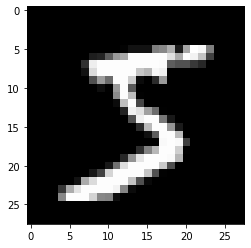

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [ ]:
data = []
for d in tqdm(x_train):
  data.append(d.flatten())

data = np.array(data)

pca = sd.PCA()

pca.n_components = 2
pca_data = pca.fit_transform(data)

print(pca_data.shape)

100%|██████████| 60000/60000 [00:00<00:00, 145053.24it/s]


(60000, 2)


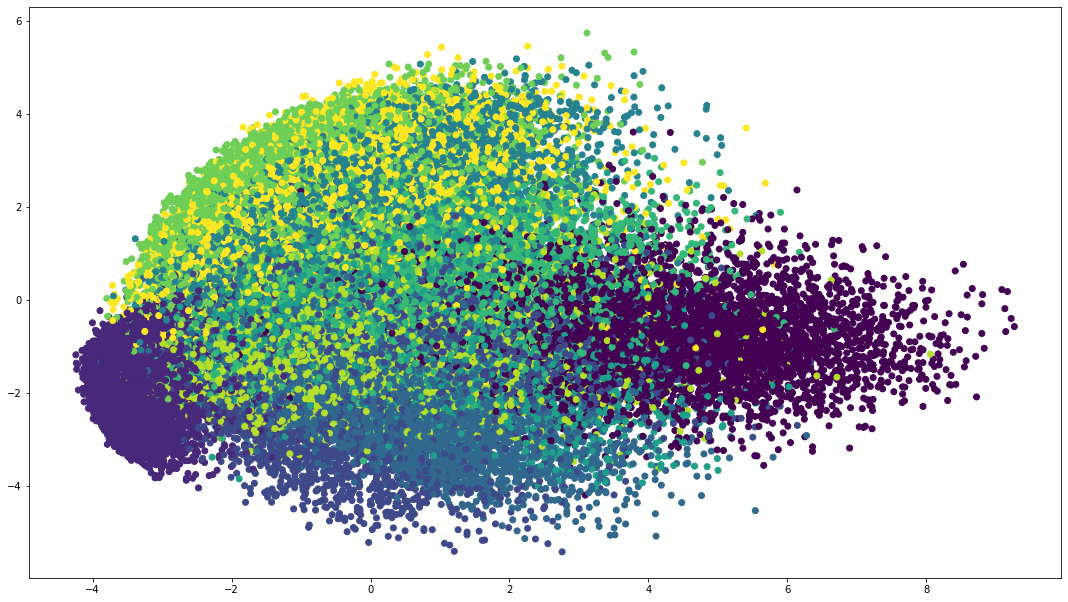

In [ ]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.scatter(pca_data[:,0], pca_data[:,1],c = y_train)
plt.show()

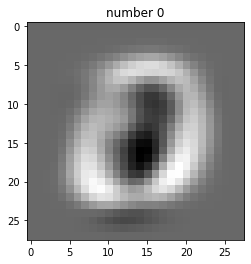

In [ ]:
Xhat = np.dot(pca_data, pca.components_)
grid_data = Xhat[1,:].reshape(28,28)
plt.imshow(grid_data, cmap = "gray")
plt.title("number {}".format(y_train[1]))
plt.show()

In [ ]:
print("the error for the reconstruction of this picture is ",np.sum(np.abs(Xhat[0,:] - data[0,:])))

the error for the reconstruction of this picture is  114.35172478797905


In [ ]:
print("final error")

error = 0
for i in tqdm(range(len(x_train))):
  error += np.sum(np.abs(Xhat[i,:] - data[i,:]))

print("\n so the final error is : ", error)

 12%|█▏        | 6989/60000 [00:00<00:00, 69889.90it/s]

final error


100%|██████████| 60000/60000 [00:00<00:00, 61081.19it/s]


 so the final error is :  7049765.208563635
